In [1]:
pip install matplotlib networkx


  Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import networkx as nx


In [1]:
import numpy as np
from random import randrange
import random

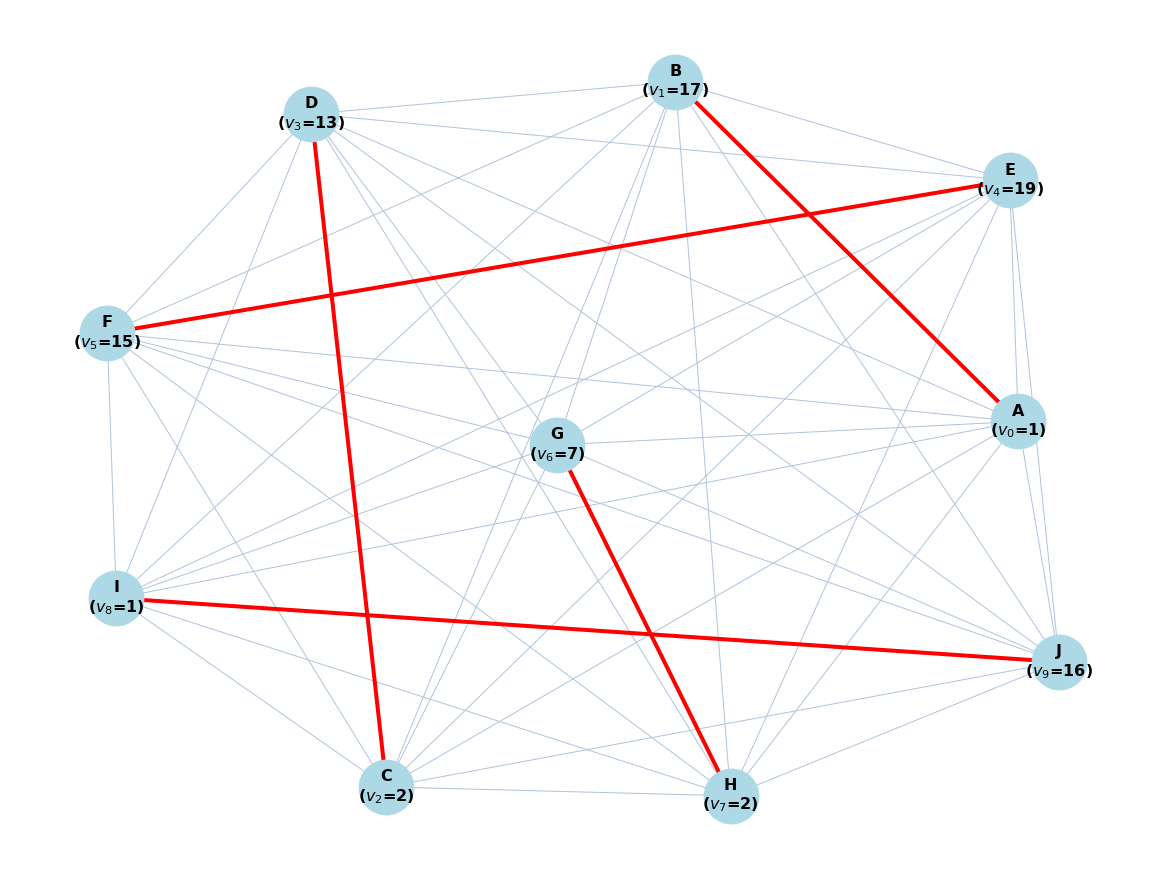

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

random.seed(259)

# Create a graph with more nodes
num_nodes = 10  # Number of nodes
G = nx.complete_graph(num_nodes)

# Define node labels and positions
values = {i: randrange(20) for i in range(num_nodes)}
labels = {i: f'{chr(65+i)}\n($v_{i}$={values[i]})' for i in range(num_nodes)}
positions = nx.spring_layout(G)  # Use spring layout for a visually appealing arrangement

# Define optimal edges for matching
optimal_edges = [(i, (i+1) % num_nodes) for i in range(0, num_nodes, 2)]

# Draw the fully connected graph with highlighted matches
plt.figure(figsize=(16, 12))
nx.draw(G, pos=positions, with_labels=True, labels=labels, node_size=3000, node_color='lightblue', font_size=16, font_weight='bold', edge_color='lightsteelblue')
nx.draw_networkx_edges(G, pos=positions, edgelist=optimal_edges, width=4, edge_color='red')

plt.show()


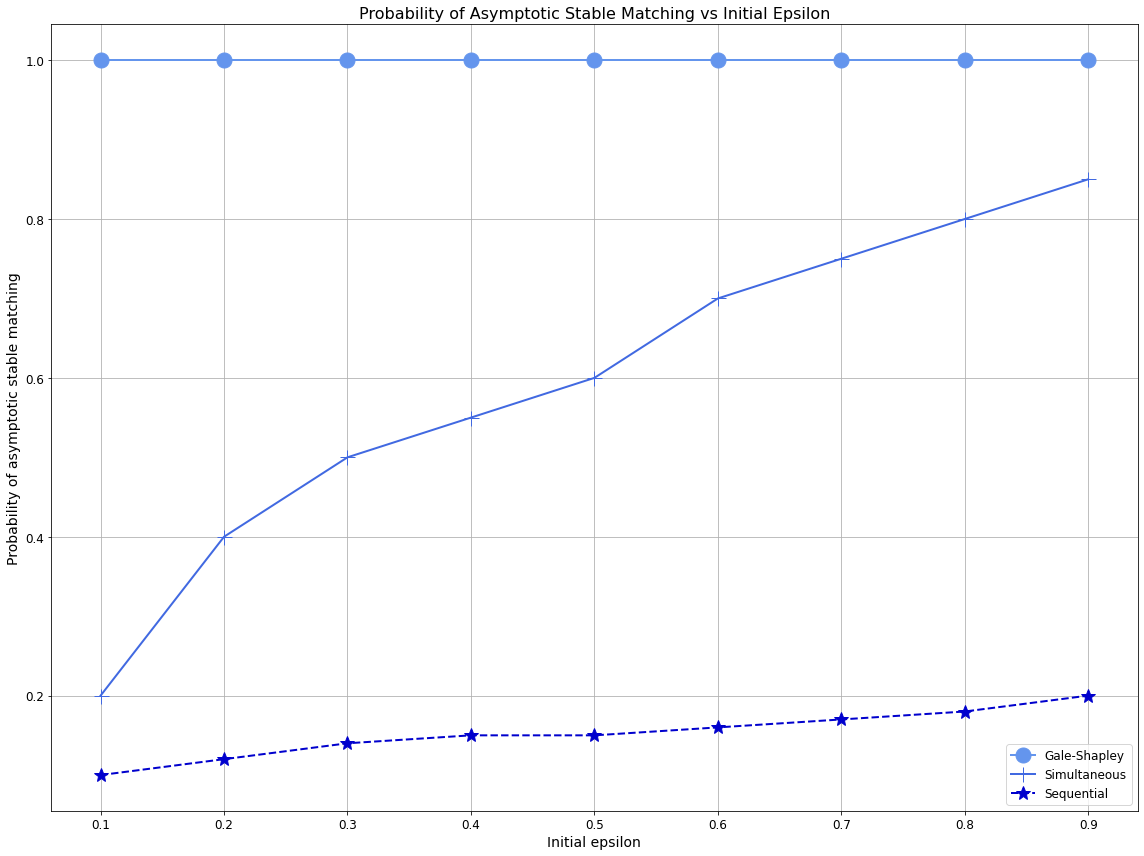

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the image
epsilon = np.arange(0.1, 1.0, 0.1)
gale_shapley = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
simultaneous = [0.2, 0.4, 0.5, 0.55, 0.6, 0.7, 0.75, 0.8, 0.85]
sequential = [0.1, 0.12, 0.14, 0.15, 0.15, 0.16, 0.17, 0.18, 0.2]

plt.figure(figsize=(16, 12))

plt.plot(epsilon, gale_shapley, 'o-', label='Gale-Shapley', markersize=15, linewidth=2, color='cornflowerblue')
plt.plot(epsilon, simultaneous, '+-', label='Simultaneous', markersize=15, linewidth=2,   color='royalblue')
plt.plot(epsilon, sequential, '*--', label='Sequential', markersize=15, linewidth=2, color='mediumblue')

plt.xlabel('Initial epsilon', fontsize=14)
plt.ylabel('Probability of asymptotic stable matching', fontsize=14)
plt.title('Probability of Asymptotic Stable Matching vs Initial Epsilon', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


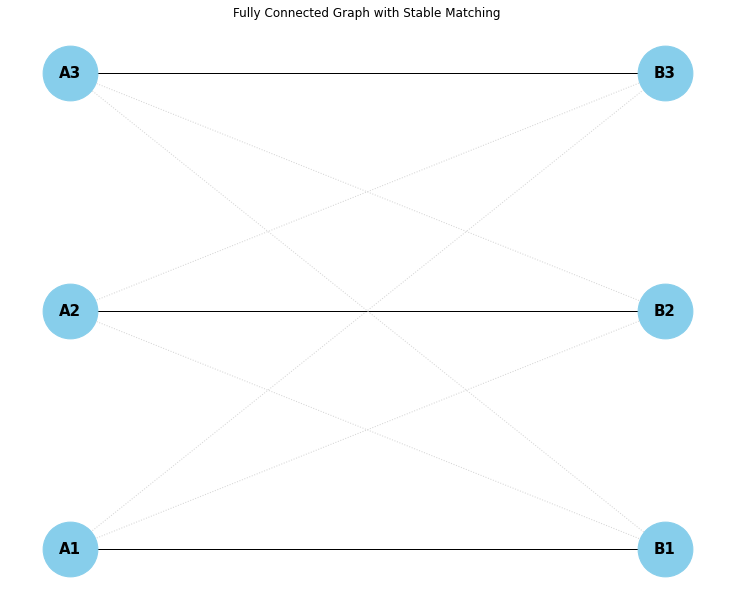

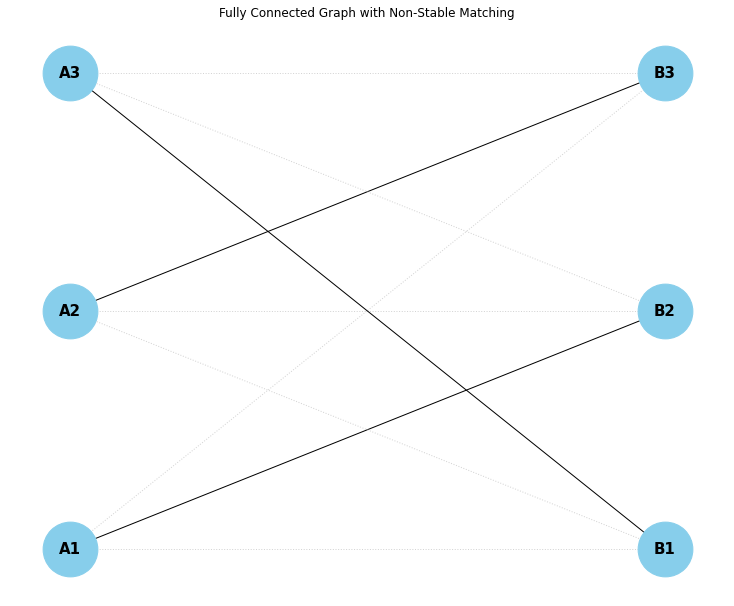

In [4]:
def draw_full_matching(matching, title, group_A, group_B):
    G = nx.Graph()
    
    # Adding nodes
    G.add_nodes_from(group_A, bipartite=0)
    G.add_nodes_from(group_B, bipartite=1)
    
    # Adding all possible edges between Group A and Group B
    all_edges = [(a, b) for a in group_A for b in group_B]
    G.add_edges_from(all_edges, color='lightgray', style='dotted')

    # Adding edges for the matching and highlight them
    G.add_edges_from(matching, color='black', style='solid')

    # Position nodes in two columns
    pos = {}
    pos.update((node, (1, index)) for index, node in enumerate(group_A))
    pos.update((node, (2, index)) for index, node in enumerate(group_B))
    
    # Get colors and styles for edges
    colors = nx.get_edge_attributes(G, 'color').values()
    styles = nx.get_edge_attributes(G, 'style').values()
    
    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=15, font_weight='bold', edge_color=colors, style=styles)
    plt.title(title)
    plt.show()

group_A = ['A1', 'A2', 'A3']
group_B = ['B1', 'B2', 'B3']

# Stable Matching
stable_matching_6 = [('A1', 'B1'), ('A2', 'B2'), ('A3', 'B3')]
draw_full_matching(stable_matching_6, "Fully Connected Graph with Stable Matching", group_A, group_B)

# Non-Stable Matching
non_stable_matching_6 = [('A1', 'B2'), ('A2', 'B3'), ('A3', 'B1')]
draw_full_matching(non_stable_matching_6, "Fully Connected Graph with Non-Stable Matching", group_A, group_B)


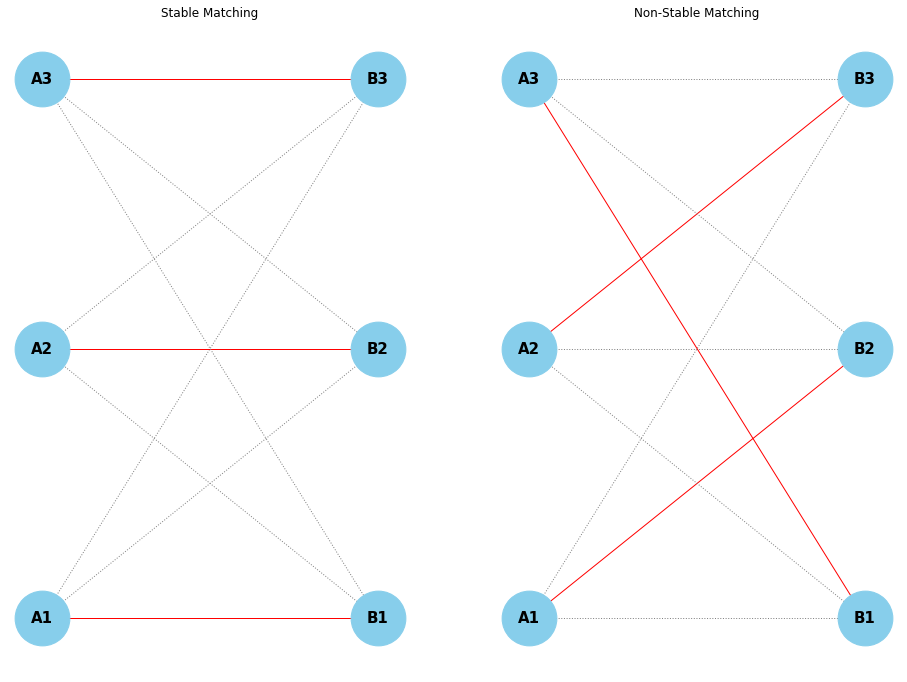

In [8]:
# Function to draw both graphs in a single figure
def draw_full_matchings_together(stable_matching, non_stable_matching, group_A, group_B):
    fig, axs = plt.subplots(1, 2, figsize=(16, 12))

    # Adding nodes and edges for stable matching
    G_stable = nx.Graph()
    G_stable.add_nodes_from(group_A, bipartite=0)
    G_stable.add_nodes_from(group_B, bipartite=1)
    all_edges = [(a, b) for a in group_A for b in group_B]
    G_stable.add_edges_from(all_edges, color='gray', style='dotted')
    G_stable.add_edges_from(stable_matching, color='red', style='solid')

    # Adding nodes and edges for non-stable matching
    G_non_stable = nx.Graph()
    G_non_stable.add_nodes_from(group_A, bipartite=0)
    G_non_stable.add_nodes_from(group_B, bipartite=1)
    G_non_stable.add_edges_from(all_edges, color='gray', style='dotted')
    G_non_stable.add_edges_from(non_stable_matching, color='red', style='solid')

    # Position nodes in two columns
    pos = {}
    pos.update((node, (1, index)) for index, node in enumerate(group_A))
    pos.update((node, (2, index)) for index, node in enumerate(group_B))

    # Get colors and styles for edges
    colors_stable = nx.get_edge_attributes(G_stable, 'color').values()
    styles_stable = nx.get_edge_attributes(G_stable, 'style').values()
    colors_non_stable = nx.get_edge_attributes(G_non_stable, 'color').values()
    styles_non_stable = nx.get_edge_attributes(G_non_stable, 'style').values()

    # Draw stable matching graph
    nx.draw(G_stable, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=15, font_weight='bold', edge_color=colors_stable, style=styles_stable, ax=axs[0])
    axs[0].set_title("Stable Matching")

    # Draw non-stable matching graph
    nx.draw(G_non_stable, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=15, font_weight='bold', edge_color=colors_non_stable, style=styles_non_stable, ax=axs[1])
    axs[1].set_title("Non-Stable Matching")

    plt.show()

# Call the function to draw both matchings together
draw_full_matchings_together(stable_matching_6, non_stable_matching_6, group_A, group_B)
